<a href="https://colab.research.google.com/github/PStettler/DSF-DCBP-Philip-Stettler/blob/main/codingTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DataScienceFundamentals2022/4ms_10 av_30 s_Absorbance_10-32-04-868 (1).txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Task 1: Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points]

In [ ]:
numberOfTextRows = 13
def import_metadata(textLines = numberOfTextRows, path = path):
  import pandas as pd
  metadata = str(pd.read_csv(path, delimiter='\t',nrows=textLines-1, header = None))
  with open('metadata.txt', 'w') as outstream:
    outstream.write(metadata)
  

In [ ]:
import_metadata()

In [ ]:
with open('metadata.txt', 'r') as instream:
     textlines = instream.readlines()
for i in range(numberOfTextRows):
     print(textlines[i])

                                                    0

0   Data from 4ms_10 av_15 s_Absorbance_10-32-04-8...

1                 Date: Thu Oct 25 10:32:04 CEST 2018

2                                     User: Christoph

3                              Spectrometer: BALLMOOS

4                                     Trigger mode: 4

5                 Integration Time (sec): 4.000000E-3

6                                Scans to average: 10

7              Electric dark correction enabled: true

8              Nonlinearity correction enabled: false

9                                     Boxcar width: 0

10                            XAxis mode: Wavelengths

11                 Number of Pixels in Spectrum: 3648


Task 2: Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]

In [19]:
import pandas as pd
df = pd.read_csv(path, delimiter = '\t', header= 13)

def reduce(data = df, step = 4, method="panda"): #methods are panda or neanderthal
  jump = round(step/(float(data.columns[3])-float(data.columns[2]))) #get distance between nm wavelength measurements
  df_means = pd.DataFrame()
  if method == "panda":
    for i in range(2,len(data.columns)-jump,jump):
      df_means[data.columns[i][0:3]] = (data.iloc[:, range(i,i+jump-1)].mean(axis=1))
      #df_means.to_csv('reduced_data.csv', index=False) #saving makes the calculation much slower
    return(df_means)
  elif method == "neanderthal":
    for j in range(0,len(data.index)):
      for i in range(2,len(data.columns)-jump,jump):
       df_means.loc[j,data.columns[i][0:3]] = data.iloc[j,range(i,i+jump-1)].mean()
       #df_means.to_csv('reduced_data.csv', index=False) #saving makes the calulation much slower
    return(df_means)





In [ ]:
%%timeit -n 10 -r 5
reduce(step=4).head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


10 loops, best of 5: 106 ms per loop


In [ ]:
%%timeit -n 1 -r 3
reduce(step=4, method="neanderthal").head() #super slow

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


1 loop, best of 3: 1min 34s per loop


In [ ]:
reduce(step=10).head()

,316,326,336,346,356,366,376,386,396,405,...,688,697,706,715,724,733,742,751,759,768
0,-0.018490,0.048565,0.062623,0.211462,0.350705,0.322842,0.437315,0.646928,1.025390,1.237870,...,-0.044350,-0.044042,-0.043280,-0.044981,-0.043405,-0.041209,-0.040155,-0.040363,-0.039986,-0.038578
1,0.262276,0.026836,0.201308,0.614741,0.441661,0.432296,0.481400,0.679682,1.065417,1.300122,...,-0.044461,-0.044006,-0.043457,-0.045116,-0.043621,-0.041162,-0.040301,-0.040711,-0.040170,-0.038503
2,-0.054789,0.045395,0.161697,0.338626,0.418543,0.397636,0.474875,0.688765,1.083736,1.298780,...,-0.044245,-0.044158,-0.043483,-0.045274,-0.043384,-0.041433,-0.040195,-0.040766,-0.040408,-0.038389
3,0.042318,0.014055,0.080012,0.267288,0.336035,0.341843,0.438091,0.653731,1.042373,1.276775,...,-0.043737,-0.043457,-0.042663,-0.044799,-0.042832,-0.040540,-0.039830,-0.039914,-0.039473,-0.038029
4,0.003267,0.092358,0.088837,0.211805,0.331123,0.310795,0.420119,0.641696,1.014449,1.233021,...,-0.044112,-0.043731,-0.043096,-0.045042,-0.043242,-0.041048,-0.039912,-0.040353,-0.039893,-0.038466


In [ ]:
reduce(step=10, method="neanderthal").head() #identical results

,316,326,336,346,356,366,376,386,396,405,...,688,697,706,715,724,733,742,751,759,768
0,-0.018490,0.048565,0.062623,0.211462,0.350705,0.322842,0.437315,0.646928,1.025390,1.237870,...,-0.044350,-0.044042,-0.043280,-0.044981,-0.043405,-0.041209,-0.040155,-0.040363,-0.039986,-0.038578
1,0.262276,0.026836,0.201308,0.614741,0.441661,0.432296,0.481400,0.679682,1.065417,1.300122,...,-0.044461,-0.044006,-0.043457,-0.045116,-0.043621,-0.041162,-0.040301,-0.040711,-0.040170,-0.038503
2,-0.054789,0.045395,0.161697,0.338626,0.418543,0.397636,0.474875,0.688765,1.083736,1.298780,...,-0.044245,-0.044158,-0.043483,-0.045274,-0.043384,-0.041433,-0.040195,-0.040766,-0.040408,-0.038389
3,0.042318,0.014055,0.080012,0.267288,0.336035,0.341843,0.438091,0.653731,1.042373,1.276775,...,-0.043737,-0.043457,-0.042663,-0.044799,-0.042832,-0.040540,-0.039830,-0.039914,-0.039473,-0.038029
4,0.003267,0.092358,0.088837,0.211805,0.331123,0.310795,0.420119,0.641696,1.014449,1.233021,...,-0.044112,-0.043731,-0.043096,-0.045042,-0.043242,-0.041048,-0.039912,-0.040353,-0.039893,-0.038466


Task 3: Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points]

In [20]:
import numpy as np
import matplotlib.pyplot as plt
def difference_plt(data = df, col1 = 800, col2 = 2000):
  dif = data.iloc[:,col1].values - data.iloc[:,col2].values
  secs = (data.iloc[:,1] - data.iloc[0,1])/1000 #caculate the seconds from the time-stamps
  fig, ax = plt.subplots()
  ax.plot(secs, dif,'o');
  plt.ylabel("difference");
  plt.xlabel("seconds");
  plt.title("The Title");
  plt.legend(['Data']);
  plt.savefig('pathToFilename.png')

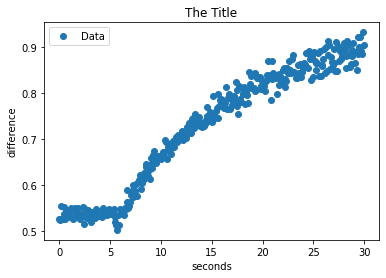

In [21]:
difference_plt()

Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


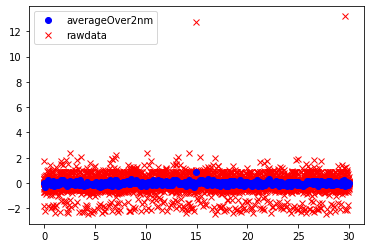

In [ ]:
red_2nm = reduce(step=2)
secs = (df.iloc[:,1] - df.iloc[0,1])/1000
fig, ax = plt.subplots()
ax.plot(secs,red_2nm.iloc[:,0].values,'bo');
ax.plot(secs,df.iloc[:,2:17].values,'rx')
ax.plot(secs,red_2nm.iloc[:,0].values,'bo'); #wet but does the job...
plt.legend(['averageOver2nm','rawdata']);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


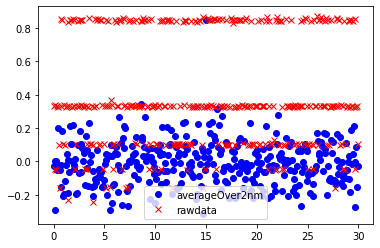

In [ ]:
#measurements at individual wavelengths differ highly from the mean
red_2nm = reduce(step=2)
secs = (df.iloc[:,1] - df.iloc[0,1])/1000
fig, ax = plt.subplots()
ax.plot(secs,red_2nm.iloc[:,0].values,'bo');
ax.plot(secs,df.iloc[:,2].values,'rx')
plt.legend(['averageOver2nm','rawdata']);